Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 4 </h2>
    <h1> MLP y Regresión Logística </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 20 de Octubre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

A continuación se encuentran las librerías necesarias para elaborar la tarea. Recuerda ejecutar la celda antes de comenzar.

In [69]:
import pandas as pd
# from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from typing import List
# import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import itertools


## Contexto: Cáncer de mama

Octubre es dedicado como el "Mes de la Sensibilización sobre el Cáncer de Mama". Este tipo de cáncer afecta a millones de personas en el mundo, y a pesar de los avances médicos y campañas de sensibilización, sigue siendo una de las principales causas de muerte en mujeres.Uno de los desafíos más significativos es que, en muchos casos, el cáncer de mama no presenta síntomas evidentes en sus etapas iniciales. Esto significa que la detección temprana a través de exámenes regulares y la autoexploración mamaria son cruciales para mejorar las tasas de supervivencia y reducir la gravedad de la enfermedad en el momento del diagnóstico.


En el ámbito de la minería de datos, las herramientas y técnicas que se enseñan en este curso adquieren un valor excepcional en el campo de la salud, especialmente en lo que respecta a la detección de enfermedades. La minería de datos ofrece una poderosa capacidad para analizar grandes conjuntos de información médica, identificar patrones y tendencias ocultas, y desarrollar modelos predictivos precisos. Por lo tanto, deseamos destacar la utilidad de los conocimientos y modelos que se adquieren en este curso, ya que tienen un impacto real y significativo en la ciencia médica.

Gracias a la aplicación de la minería de datos, podemos mejorar sustancialmente la eficiencia de la detección de enfermedades. Esto significa que podemos identificar señales tempranas de enfermedades, realizar diagnósticos más precisos y predecir la progresión de condiciones médicas. En última instancia, esta capacidad tiene el potencial de salvar vidas al permitir intervenciones médicas más oportunas y efectivas.

## Bonus (3 puntos) 🔥

Al momento de escribir codigo es importante asegurarnos de que tanto nosotros como otras personas seran capaces de entenderlo. Con este fin, se utilizan diferentes medios como por ejemplo los comentarios al momento de implementar, docstrings para metodos, clases y modulos, type-hinting, entre otros. Debido a lo importante de esto, es que en esta tarea se otorgara un bonus de 3 puntos por el correcto uso de type-hinting al momento de declarar variables y funciones.

## Parte 1: Carga y Preprocesamiento de Datos (10 Pts.)

Para esta tarea, deberás utilizar el dataset [Breast Cancer Wisconsin](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) que se puede encontrar en Kaggle.

### 1.1 Carga de Datos (1 Pts.)

In [70]:
# Cargamos los datos en la varible data
data = pd.read_csv('breast_cancer_dataset.csv')

### 1.2 Descripción del Dataset (3 Pts.)
A continuación, presenta una descripción detallada del dataset. Se espera que investigues los datos, y expliques en que consisten al menos 9 columnas. Dentro de la explicación, menciona a qué tipo de datos corresponde cada columna. ¿Cuál es la columna objetivo? ¿Qué significa cada valor de esta columna?

In [71]:
data.head(n=5) # Mostramos las primeras 5 columnas del dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


👉🏻 El dataSet contiene las caracteristicas a partir de imagenes digitalizadas de una puncion aspirativa con aguja fina PAAF$^1$ de una masa mamaria. Estas caracteristicas describen al nucleo celular presente en la imagen. 

👉🏻 Cada fila del ```dataset``` corresponde a las caracteristicas de la imagen digitalizada de la masa mamaria. En ella podemos encontrar las siguientes caracteristicas: 

* **id**: Numero ID de la imagen digitalizada. Corresponde a una variable de numerica y el valor es de tipo entero. 
* **Diagnosis**: Carácter M o B, el cual hace referencia si el diagnosis del tejido mamario fue diagnosticada con un tumor benigno (las celulas no son cancerígenas), o maligno (las celulas son cancerígenas). Corresponde a una variable de tipo categorica, y el valor es de tipo texto.
Las siguientes caracteristicas son variables de tipo continuas en donde el valor que presentan es de tipo decimal:
* **radius**: Distancia promedio formada entre los puntos que se encuentran entre el perimetro hasta el centro del nucleo celular. 
* **perimeter_mean**: Tamaño promedio del tumor central de la imagen. 
* **area_mean**: Area promedio del tumor central de la imagen. 
* **radius_se**: Error estandar del promedio de las distancias desde el centro hasta los puntos del perimetro del tumor central de la imagen. 
* **radius_worst**: el valor promedio mas grande de los valores de las distancias promedio desde el punto central hasta los puntos del perimetro del tumor presente en la imagen. 
* **symmetry_mean**: Dentro del area especializada en la clasificacion de tumores cancerigenos, cuando nos referimos a la simetria de un tumor se basa en que tan regular o irregular es la forma del tumor. Dentro del contexto del dataset, el atributo "Simestria promedio" se refiere a la forma del tumor central de la imagen $^2$, es decir, cuantifica que tan irregular o simetrico es la forma del tumor en la imagen. 
* **area_se**: Error estandar del area promedio del tumor central de la imagen. 

👉🏻 Nuestra variable objetivo sera la caracteristica **diagnosis**, dado que nos permitira verificar el nivel de prediccion de nuestro modelo a implementar. Sera nuestra variable de respuesta ante los niveles de prediccion considerando las caracteristicas restantes del dataset. Como comentamos anteriormente, cada valor de la columna diagnosis corresponde a la clasificacion del tumor presentado en la imagen digitalizada. Este columna presenta dos valores: M y B, cuyo significado es si el tumor es maligno o benigno, respectivamente. 


$^{1\text{ Método diagnóstico basado en la obtención de material citológico procedente de un nódulo o tumoración, para luego estudiarlo microscópicamente (Elsevier, 2008)}}$ [Link](https://www.elsevier.es/es-revista-anales-pediatria-continuada-51-articulo-puncion-aspirativa-con-aguja-fina-S1696281808748819)

$^{2 \text{ Clasificacion de la simetria o irregularidad de la forma de un tumor}}$ [Link](https://www.mdpi.com/2073-8994/15/3/571)

### 1.3 Limpieza del set de datos (3 Pts.)

En esta sección, deberás revisar el dataset y hacer una limpieza de los datos. Esto significa que deberás tratar posibles `datos nulos, outliers, columnas innecesarias`, etc. 🧐 Además, es importante que utilices One Hot Encoding para el diagnóstico, dejando 0 a las muestras benignas y 1 a las malignas.

**IMPORTANTE:** más allá del código, lo más importante aquí es `explicar` lo que estás haciendo, las decisiones para limpiar que tomas y sobre todo `justificar`. Hay libertad en cuanto a lo que se puede hacer, pero es **importante** que se justifique cualquier procedimiento.

In [72]:
# En primer lugar eliminaremos la ultima columna "Unnamed: 32", la cual solo contiene valores nulos en el dataset
data = data.drop(['Unnamed: 32'], axis=1)
# Por otra parte, eliminaremos la columna ID de cada imagen, ya que para este caso no es una caracteristica que 
# describa numericamente las cualidades del tumor de la imagen. Solo la guardaremos por si es que la utilizamos en un futuro. 
id_column = data['id']
data = data.drop(['id'], axis=1)

In [73]:
# Luego verificaremos si el dataset contiene datos nulos. En el caso que si, eliminamos las filas correspondientes. 
data[data.isnull().any(axis=1)]

# Notamos que no existen filas nulas

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [74]:
# Ahora cambiaremos el tipo atributo diagnosis a una variable de tipo cualitativa binaria, es decir, 
# utilizaremos one hot encodding para el diagnostico: B = 0 y M = 1
data['diagnosis'] = data['diagnosis'].replace('B', 0)
data['diagnosis'] = data['diagnosis'].replace('M', 1)
data


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


📌 En este caso implementamos deteccion de outliers usando LOF, ya que nos permite eliminar los outliers del dataset de manera directa. Solo consideramos los datos mas agrupados (inliners), mientras que los outliers son eliminados del dataset. Asi presentamos nos permite evitar la redundancia y presentar mejoras al momento de realizar predicciones. 

In [75]:
# Finalmente eliminaremos los outliers del dataset detectandolos utilizando LOF para k = 5.

# Primero normalizaremos el data mediante MinMax Scaler para verificar el umbral del corte
data_scaled = MinMaxScaler().fit_transform(data.values)

# Luego reducimos la dimensionalidad de data_normalized con un 90% de varianza retenida
pca = PCA(0.90, whiten=True)
data_pca = pca.fit_transform(data_scaled)
data_pca.shape

(569, 6)

In [76]:
# Luego de haber reducido la dimensionalidad a 6 componentes, obtenemos el umbral de corte 
# con 5 vecinos cercanos para cada dato
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(data_pca)
scores = lof.negative_outlier_factor_

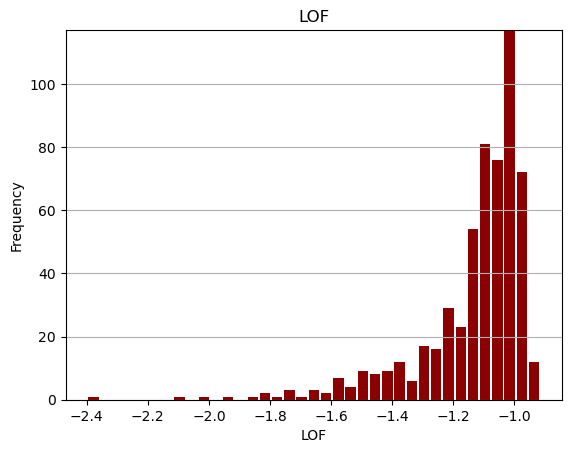

In [77]:
def plot_hist(X: pd.DataFrame, title: str) -> None:
    """ Funcion que genera un grafico de los valores de LOF del dataset """
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85, color='darkred')
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    
plot_hist(scores, 'LOF')

In [78]:
# Dado el grafico anterior, diremos que un umbral de corte sera aproximadamente -1.85
def lof_threshold(v: float, scores: np.ndarray) -> float:
    ''' Retorna la contaminacion del medio '''
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold 

lof_threshold(-1.85,scores) # Contaminacion del medio

0.008787346221441126

In [79]:
# Obtenemos que la contaminacion del medio es de un 0.0070298767 aproximadamente, y
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.00878734622)
labels = lof.fit_predict(data_pca)

# Obtenemos los indices de los datos que son inliners
indices = list(np.where(labels==1)[0])

# Eliminamos los outliers del dataset 'data', filtrando el dataset solo con los datos
# que no son inliners (label = 1)
data_without_outliers = data.values[indices,:] 

In [80]:
print(list(np.where(labels==-1)[0])) # Podemos ver que tenemos solamente 5 outliners

[3, 203, 212, 461, 491]


In [81]:
# Ahora podemos visualizar el data anterior y el actual, tal que el actual no presenta los 5 outliers. 
print(f'Anterior: {data.shape}, Actual: {data_without_outliers.shape}')

Anterior: (569, 31), Actual: (564, 31)


In [82]:
# Tambien, eliminaremos las imagenes que tambien corresponden a outliers
id_column[indices]

0        842302
1        842517
2      84300903
4      84358402
5        843786
         ...   
564      926424
565      926682
566      926954
567      927241
568       92751
Name: id, Length: 564, dtype: int64

### 1.4 Normalización de datos (3 Pts.)

Normaliza los datos y responde las preguntas:
1. ¿Por qué es necesario normalizar los datos?
2. ¿Qué tipo de normalización se utilizó? ¿Por qué?
3. ¿Qué columnas se normalizaron? ¿Por qué?
4. Explique la diferencia entre el uso de `standard scaler` y `minmax scaler` como estrategia para normalizar.

In [83]:
# Antes de normalizar, verificaremos el rango de valores para cada atributo e identificaremos
# cuales son las caracteristicas que presentan rangos de valores fuera de [0,1]
def get_columns_with_range_out_of_0_1(data: pd.DataFrame) -> List[str]:
    ''' Retorna las columnas donde el rango de valores no esta en [0,1] '''
    columns = []
    for i in range(data.shape[1]):
        if data[data.columns[i]].max() > 1 or data[data.columns[i]].min() > 1:
            columns.append(i)
    return columns

# Obtenemos los indices de las caracteristicas que presentan valores fuera de [0,1]
columns_index_with_range_out_0_1 = get_columns_with_range_out_of_0_1(data)

In [84]:
# Realizamos un escalamiento de los datos dentro de un intervalo [0,1]
# Solo realizaremos un escalamiento de las columnas que no presentan datos que oscilan entre 0 y 1. 
scaler = MinMaxScaler()
data_without_outliers[:, columns_index_with_range_out_0_1] = scaler.fit_transform(data_without_outliers[:, columns_index_with_range_out_0_1])

# Redefinimos el dataset 
X_scaled = data_without_outliers 

1. Normalizar los datos nos permite tener mejores resultados al momento de realizar predicciones. Ademas, evitamos la redundancia de datos y establecemos margen general de valores para todos los datos tal que no se presenta una gran dispersion entre ellos.

2. Utilice el tipo de normalizacion ```MinMaxScaler```, ya que nos permite establecer todos los valores dentro de un mismo rango que varia entre 0 y 1, inclusive. Esto fue realizado, dado que nos permite asegurarnos que los datos estend entro de un intervalo fijo y no obtener grandes variaciones de valores entre ellos. Ademas, tener valores que oscilen entre 0 y 1 es mas comodo para modelos que presentan predicciones mediante estrategias probabilisticas. 

3. Normalice solo las columnas que presentan valores que no estan dentro del rango [0,1]. En este caso, son solos las columnas con indices en ```columns_index_with_range_out_0_1```. Esto nos permite mantener los valores originales de las caracteristicas ya con valores entre 0 y 1, y adecuar los valores que no estan dentro de la misma escala. 

4. *StandardScaler* es un tipo de normalizacion que transforma cada dato centrado entorno a la media, mientras que MinMaxScaler, o conocido como *Scaling*, establece cada dato dentro del intervalo [0,1]. Como estrategia para normalizar, StandardScaler funciona correctamente cuando los datos se distribuyen de manera normal. A diferencia de Scaling, esta preserva de mejor manera la distancia entre los puntos y es menos sensible frente a la presencia de outliers. Mientras que para MinMaxScaler, transforma cada dato en una probabilidad. No retiene de la mejor manera las distancias entre cada dato. Es mas sensible frente a la presencia de outliers. Y tambien, es mas preferible de usar cuando no se tiene conocimiento de la forma en que se distribuyen los datos

### 1.5 Partición training/testing (0 Pts.)
Cree particiones de training/testing con test_size=0.3. Recuerda recuperar la variable objetivo "y" del dataset y `separarla` de los datos.

In [85]:
# Guardamos la variable objetivo sin outliers y la eliminamos del dataset:
y = X_scaled[:, 0] # Atributo 'diagnosis'

# Eliminamos el atributo 'diagnosis' del dataset
X_scaled = np.delete(X_scaled, 0, axis=1)

In [86]:
# Luego creamos las particiones de training/testing con test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3) 

## Parte 2: Perceptron y Multi Layer Perceptrón (25 Pts.)

### 2.1 Perceptron (5 Pts.)
Investigue sobre `Perceptron`🤖 y de una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para `demostrar tu aprendizaje` 🚀. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: ¿Qué es? ¿Para qué sirve? ¿Cómo funciona? ¿Cuáles son sus ventajas y desventajas? ¿En qué situaciones se puede utilizar? ¿Qué tipo de problemas puede resolver? ¿Qué son los pesos y función de activación? ¿Cuáles son las limitaciones del modelo?

__¿Qué es?__ 

👉🏻 Perceptron es un modelo lineal que tiene la principal finalidad de clasificar los datos dentro de un espacio n-dimensional ($n\geq1$) a partir del uso de un hiperplano. Se conoce principalmente por ser un modelo de red neuronal, cuyo modelo implementado realiza una separacion lineal de los datos, clasificandolos binariamente a partir de una variable objetivo $y$. 


__¿Cómo funciona?__ __¿Qué son los pesos y función de activación?__ 


👉🏻 Como mencionamos, perceptron es un modelo de red neuronal que permite clasificar los datos de manera binaria. Este modelo esta formado por diferentes componentes al momento de clasificar. 
<figure style="text-align:center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/800px-Perceptr%C3%B3n_5_unidades.svg.png">
  <figcaption style="font-size:smaller;text-align:center;">Fuente: Wikipedia</figcaption>
</figure>

* Recibe las variables de entradas, las cuales representan el vector de caracteristicas $\textbf{x} = [\textbf{x}_1, \dots,\textbf{x}_N]$. 
* Para cada variable de entrada le asigna un peso, el cual corresponde a un parametro del modelo que representa "la influencia o que tan util" es una caracteristica. Estos coeficientes se ajustan en cada iteracion del algoritmo. 
* El algoritmo de perceptron aplica la funcion de activacion $h$ signo sobre la suma de las combinaciones lineales entre el vector de caracteristica y el vector de los pesos de cada variable. 
        $$h(\textbf{x}) = \text{sign}{(\textbf{w}^T \textbf{x})}$$
        Esta funcion de activacion permite tomar la decision al momento de clasificar cada dato dentro de una variable categorica, retornando +1 en el caso de que corresponda correctamente a la clase objetivo, o -1 en el otro caso que no cumpla esta clasificacion. La combinacion lineal $\textbf{w}^T\textbf{x}$ es mas que nada el hiperplano formado dentro del espacio n-dimensional. El objetivo de perceptron es encontrar el hiperplano optimo que permita separar "exactamente" los datos, de manera que estos sean clasificados correspondiente a una clase u otra segun el valor retornado de la funcion de activacion. Este algoritmo actualiza en cada iteracion los valores de los pesos de $\textbf{w}$, con el fin de que el vector $\textbf{w}$ se acerca al vector de las variables de entradas mal clasificadas para el caso de que $y=+1$, o se aleja de este vector para $y=-1$. 
* Los valores de salida permiten evaluar la clasificacion de cada dato. En este caso, presentamos una variable objetivo binaria $y=\{+1,-1\}$. El objetivo de perceptron es estimar esta variable objetivo a partir de la clasificacion binaria de cada dato. 

__¿Cuáles son sus ventajas y desventajas?__

👉🏻 Las principales ventajas que presenta Perceptron es su implementacion y complejidad. Dado que solo necesitamos un hiperplano para poder clasificar los datos en dos agrupaciones distintas, nos permite entender e interpretar de mejor forma los resultados del modelo. En ese sentido, es facil de implementar para problemas en donde se pueden separar los datos de manera lineal a partir de su interpretacion geometrica. Sin embargo, en consecuencia presenta desventajas tambien en el caso que presentemos datos que no se pueden separar de manera lineal. Puede ser el caso en que existan datos que tengan un alto grado de similitud, por lo que una linea recta no va a poder clasificar de manera binaria estos datos correctamente, es decir, presenta una baja capacidad de generalizacion.

__¿Cuáles son las limitaciones del modelo?__

👉🏻 Como habiamos descrito una de las principales limitaciones del modelo es su capacidad de generalizacion, es decir,  Perceptron simple solo puede separar datos aplicando funciones lineales, por lo que no podra clasificar correctamente datos que no son linealmente separables ya que el algoritmo no podra aprender de una funcion que los clasifica de manera incorrecta. 

__¿Para qué sirve?__  __¿En qué situaciones se puede utilizar?__ __¿Qué tipo de problemas puede resolver?__ 

👉🏻 Perceptron es principalmente util para problemas de clasificacion binaria, en donde se asigna/clasifica cada dato de un dataset el valor de una variable categorica. 

👉🏻 La aplicacion de redes neuronales es principalmente util en diferentes areas de las ciencias como: Noticias; Ciencias de la salud; robotica; Politica, entre otros. 

👉🏻 Es decir, perceptron solo se podria usar para problemas de clasificacion binaria que permite separar los datos linealmente, utilizando funciones lineales (que no presentan una alta complejidad). Algunos de los tipos de problemas que se pueden resolver con perceptron (siempre y cuando los datos sean linealmente separables) pueden ser como: Clasificar mensajes que son toxicos y no toxicos; Clasificacion de imagenes, entre otros. 




#### Referencias
- [GamCo - Perceptron definicion](https://gamco.es/glosario/perceptron/)
- [AprendeIA - Que es perceptron simple y multicapa](https://aprendeia.com/que-es-el-perceptron-simple-y-multicapa/)
- [Blog Damavis - Perceptron, definicion matematica y propiedades](https://blog.damavis.com/perceptron-simple-definicion-matematica-y-propiedades/)
- [Linkedin - Advantages and Disadvantages usin single layer](https://www.linkedin.com/advice/0/what-advantages-disadvantages-using-single-layer)


### 2.2 Multi Layer Perceptron (5 Pts.)
Ahora debes investigar sobre `Multi Layer Perceptron (MLP)` y nuevamente explicar con tus propias palabras cómo funciona. Debes poner énfasis en las principales diferencias y cambios que tiene con respecto al `Perceptron`. Agrega en tu desarrollo la respuesta a la siguiente pregunta: ¿Por qué es conveniente utilizar MLP para el dataset presentado en esta tarea?

__¿Que es?__

👉🏻 Multi Layer Perceptron es un modelo de redes neuronales construido por multicapas (e.g una coleccion de Perceptrones). Tiene como objetivo clasificar patrones en problemas donde no se permite una clasificacion solamente utilizando funciones con complejidad lineal (e.g. datos no linealmente separables). La estructura de las redes neuronales contiene 3 capas principales: _input layer_, _hidden layer_, y _output layer_. 
<figure style="display: block; margin-left: auto; margin-right: auto; text-align: center;">
  <img src="https://rasbt.github.io/mlxtend/user_guide/classifier/NeuralNetMLP_files/neuralnet_mlp_1.png">
  <figcaption style="font-size:smaller;text-align:center;">Fuente: mlxtend - MLP</figcaption>
</figure>
Estas capas presentan distintos propositos entre si: 

1. __input layer__: Recibe las variables de entrada 
2. __hidden layer__: Una o mas capas de redes neuronales que estan entre las capas input y output, cuyo proposito es aplicar funciones no lineales dentro del procesamiento de la informacion recibida por la capa _input_, y permiten al modelo MLP aprender problemas complejos. 
3. __output layer__: Capa en donde se retorna el resultado final a partir de la data procesada a través de la capa oculta (_hidden layer_). 

__¿Cuales son las principales diferencias con respecto a ```Perceptron```?__

👉🏻 Una de las principales diferencias con entre MLP y Perceptron es que el primero aprende de los datos aplicando funciones no lineales, mientras que el segundo solo puede aprender de los datos si estos son linealmente separables (e.g. aplicando funciones de complejidad lineal). Es por ello que ambos modelos estan enfocados a resolver problemas con diferente complejidad. En el caso de Perceptron, esta implementado para resolver problemas simples, en donde solo se requiere como resultado una clasificacion binaria de una variable categorica para cada dato. Mientras que MLP puede ser utilizado para problemas con mayor complejidad. 

__¿Que tipos de problemas resuelve?__

👉🏻 El modelo Multi Layer Perceptron puede ser aplicado en diferentes problemas, como por ejemplo: reconocimiento de patrones; optimizacion; prediccion, y entre otros.

__¿Por qué es conveniente utilizar MLP para el dataset presentado en esta tarea?__

👉🏻 Mi hipotesis de por que es conveniente usar MLP frente a Perceptron se basa principalmente en la complejidad y distribucion de los datos. Ya que, MLP nos permite procesar datos aplicando funciones no lineales, mientras que Perceptron se limita segun que tan linealmente separados estan los datos. Si nuestro dataset llegase a no poder ser clasificado binariamente a partir del hiperplano que utiliza el algoritmo Perceptron, entonces puede ser el caso en que obtengamos resultados incorrectos o mal clasificados. Por otra parte, la capacidad predictiva de MLP es mas acertada que Perceptron. Esto se debe a que MLP actualiza los coeficientes pesos mediante el algoritmo __Back Propagation__, cuya finalidad es buscar el minimo valor de error a partir del calculo del gradiente descendente. En este caso, los pesos que minimicen la funcion de error seran parte de la solucion del problema de aprendizaje. En consecuencia, MLP mejora cada vez mas su prediccion dado a la minimizacion de la funcion de error. Mientras que Perceptron, en cada iteracion varia su prediccion de manera _aleatoria_. 

#### Referencias
- [Towards Data Science - Multi-Layer Perceptron explained with a real example](https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141)
- [Science Direct - Multi layer perceptron](https://www.sciencedirect.com/topics/computer-science/multilayer-perceptron)
- [Medium - MLP Neural network algorithm and its components](https://medium.com/analytics-vidhya/multi-layer-perceptron-neural-network-algorithm-and-its-components-d3e997eb42bb)
- [Baeldung - Hidden layers](https://www.baeldung.com/cs/hidden-layers-neural-network)
- [University of New South Wales - BackPropagation Algorithm](https://www.cse.unsw.edu.au/~cs9417ml/MLP2/BackPropagation.html)


### 2.2 Crear y entrenar el modelo (7 Pts.)
Entrene un clasificador de MLP con los datos de `entrenamiento`. Tienes libertad para modificar los hiperparámetros, cantidad de capas, neuronas, etc. Pero toda decisión debe ser `justificada`. Recuerda que el objetivo es obtener el mejor modelo posible. Para justificar tus decisiones puedes experimentar, buscar documentación o lo que estimes conveniente.

**Importante:** No se evalúa que el modelo sea el mejor, si no que se justifiquen las decisiones tomadas. Es decir, no sirve de nada tener un porcentaje de acierto alto si no se justifica por qué se llegó a ese resultado.

### 2.3 Evaluar el modelo (2 Pts.)
Evalúe el modelo con los datos de `testing` y calcule `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significan 👀.

### 2.4 Matriz de confusión (6 Pts.)
Genere una `matriz de confusión` normalizada del modelo y responda las preguntas:
1. ¿Qué significa cada fila de la matriz?
2. ¿Qué significa cada columna de la matriz?
3. Explique error `tipo I` y error `tipo II` en base a la matriz de confusión.
4. En relación al problema de cáncer de mama, ¿que tipo error es más grave? ¿Por qué?

1. 👉🏻
2. 👉🏻
3. 👉🏻
4. 👉🏻

## Parte 3: Regresión Logística (20 Pts.)

### 3.1 Teoría Regresión Logística (10 pts)
Al igual que con Perceptron, investiga sobre `Regresión Lógistica` y da una explicación con tus propias palabras de cómo funciona. Nuevamente no se espera una demostración matemática, el objetivo es que demuestres tu aprendizaje. Puedes apoyarte de las siguientes preguntas guía: ¿Qué es? ¿Qué tipo de problemas resuelve? ¿Cómo se calcula la probabilidad? ¿Qué función de activación utiliza? ¿Qué se busca durante el proceso de entrenamiento? ¿Qué son los coeficientes? ¿Cómo se toma la decisión final de clasificación? ¿Cuál es la relación con la regresión lineal? 

**¿Qué es?**

👉🏻 Regresion logistica es una estrategia estadistica que implementa un algoritmo de clasificacion binaria sobre un set de datos para predecir probabilisticamente la pertenencia de cada dato con respecto a alguna variable categorica. 

**¿Qué tipo de problemas resuelve?** 

👉🏻 Tiene como objetivo resolver problemas de clasificacion binaria. Ademas, Es una tecnica altamente recomendada para el analisis de datos, ya que se puede implementar con el fin de predecir eventos mediante probabilidades. Es usado para predecir variables categorias dependientes usando un conjunto de variables independientes. Por otra parte, tambien resuelve problemas de la evaluacion de modelos de prediccion, evaluando el rendimiento de este con las medidas _accuracy_, _precission_, _recall_ y _f1-score_.

**¿Cómo se calcula la probabilidad?** 

👉🏻 Definamos $\textbf{x}$ y $\textbf{w}$ como el vector del conjunto de caracteristicas y el de los pesos de entradas (parametro del modelo), respectivamente, dentro de un espacio d-dimensional. 
$$\textbf{w} = \begin{bmatrix}w_0 \\ w_1 \\ \vdots \\ w_d\end{bmatrix}\in\mathbb{R}^{d+1} \hspace{1cm} \textbf{x} = \begin{bmatrix}1 \\ x_1 \\ \vdots \\ x_d\end{bmatrix} \in {1} \times \mathbb{R}^d$$
Para poder calcular la probabilidad de prediccion, Regresion logistica utiliza la funcion _sigmoid_ para transformar la sumatoria de las combinacion lineal $\textbf{w}^T\textbf{x}$ dentro de un dominio cerrado, tal que asi nos permite obtener la prediccion en terminos probabilisticos. En este sentido, podemos definir $s = \textbf{w}^T\textbf{x}$ y la funcion de _sigmoid_ como:
$$\theta(s) = \frac{1}{1+e^{-s}}$$
en donde $\theta(s)$ solo se mueve entre 0 y 1.

<div style="text-align:center"><img src="https://media.geeksforgeeks.org/wp-content/uploads/20190522162153/sigmoid-function-300x138.png"></div>

**¿Qué función de activación utiliza?** 

👉🏻 La funcion de activacion que utiliza la tecnica regresion logistica es la funcion logistica _sigmoid function_, en donde la suma de las combinaciones lineales entre cada caracteristica con un peso respectivo se transmiten a traves de esta funcion de activacion, y posteriormente esta determina un valor binario de 0 o 1, clasificando los datos. 

**¿Qué se busca durante el proceso de entrenamiento?** 

👉🏻 Durante el proceso de entrenamiento se busca el rendimiento del modelo a partir de la determinacion de los parametros del modelo, es decir, se tiene como objetivo buscar los parametros que "maximizan" la precision del modelo sobre la variable objetivo categorica, evaluando tanto su nivel de acierto y clasificacion. 

**¿Qué son los coeficientes?** 

👉🏻 Dentro del contexto del modelo de regresion logistica, determinamos la probabilidad de que una variable objetivo pertenezca a una categoria especifica (clasificacion binaria). Cada variable esta asociada a un coeficiente (o peso), en donde cada peso asignado puede tomar un valor positivo o negativo. Los coeficientes son los parametros estimados del modelo de regresion logistica. El valor de este parametro depende de la "relevancia" que presenta cada variable, por lo que se ajusta segun _la magnitud que  aporta_ la variable dentro de la prediccion del modelo. 

**¿Cómo se toma la decisión final de clasificación?** 

👉🏻 La decision final de clasificacion se determina en base al valor que toma la funcion de activacion. Esta clasificacion binaria se realiza de la siguiente manera. Por ejemplo, dado un set de imagenes, queremos clasificar las imagenes que contienen un arbol y las que no, es decir, si la probabilidad es mas cercana a 1 y sobre 0.5, entonces la imagen contiene un arbol. Mientras que si la probabilidad es mas cercana a 0 y menor o igual a 0.5, entonces la imagen no contiene un arbol. Esta logica de clasificacion binaria implementa el modelo de regresion logistica para decidir la asignación de cada dato con respecto a una variable categorica. En este sentido, si el valor retornado de la funcion es mas cercano a 1 (sobre 0.5), entonces el objeto a clasificar presenta una mayor probabilidad de ser clasificado correctamente (por ejemplo, como un arbol). En el caso contrario, si el valor retornado es mas cercano a 0, entonces el objeto no es clasificado como un arbol. 

**¿Cuál es la relación con la regresión lineal?** 

👉🏻 La relacion entre el modelo de regresion lineal y logistica recae en que ambos modelos determinan un valor de prediccion basado en variables independientes. La diferencia se presenta en que la regresion lineal es utilizado para predecir una variable continua, mientras que la regresion logistica es utilizado para predecir una variable categorica. 



### 3.2 Crear y entrenar el modelo (3 Pts.)

Crea y entrena un modelo de regresion logistica con los datos de entrenamiento, donde a traves del parametro `solver`, deberas elegir minimo 3 opciones diferentes de algoritmos de optimizacion, responder `cuales son sus principales diferencias` respecto a como actualizan los parametros del modelo y `dar una hipotesis` sobre cual crees que sera el algoritmo que funcione mejor para este dataset. Recuerda que la idea es que `justifiques tu respuesta`.

In [87]:
solvers = ['liblinear', 'sag', 'newton-cg']

clf_1 = LogisticRegression(solver='liblinear')
clf_1.fit(X_train, y_train)

clf_2 = LogisticRegression(solver='sag')
clf_2.fit(X_train, y_train)

clf_3 = LogisticRegression(solver='newton-cg')
clf_3.fit(X_train, y_train)

clfs = [clf_1, clf_2, clf_3]

### 3.3 Evaluar el modelo (2 Pts.)

Para `cada uno` de los tres modelos anteriores, evalua el modelo con los datos de testing y calcula `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significan 👀.

In [88]:
for index, clf in enumerate(clfs):
    print(f" {solvers[index]} ".center(60, "*"))
    print(f'Score: {clf.score(X_test, y_test)}'.center(60))
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))


************************ liblinear *************************
                 Score: 0.9588235294117647                  
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       101
         1.0       1.00      0.90      0.95        69

    accuracy                           0.96       170
   macro avg       0.97      0.95      0.96       170
weighted avg       0.96      0.96      0.96       170

*************************** sag ****************************
                 Score: 0.9705882352941176                  
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       101
         1.0       1.00      0.93      0.96        69

    accuracy                           0.97       170
   macro avg       0.98      0.96      0.97       170
weighted avg       0.97      0.97      0.97       170

************************ newton-cg *************************
                 Score: 0.970588235294117

### 3.4 Matriz de confusión (5 Pts.)

De los modelos elegidos previamente, escoja el que mejor funcione y genere una `matriz de confusión` del modelo y responda la siguiente pregunta:

1. ¿Que tan grave es el error que tenemos segun la matriz de confusión en el problema de cáncer de mama? ¿Por qué?

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


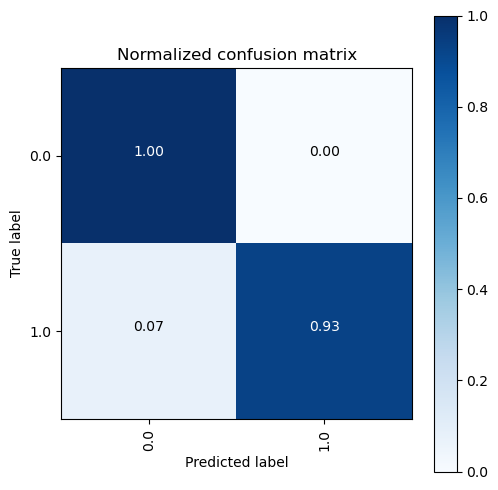

In [90]:
y_pred = clf_3.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

classes = np.unique(y)

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

__¿Que tan grave es el error que tenemos segun la matriz de confusión en el problema de cáncer de mama? ¿Por qué?__

👉🏻

## Parte 4: Comparación de Modelos (5 Pts.)

### 4.1 Comparación de modelos (5 Pts.)
Una vez implementado cada modelo con los datos, compara los resultados obtenidos.
1. ¿Que modelo posee el mejor `rendimiento` en este caso? ¿Por qué?
2. ¿Qué métricas se utilizaron para comparar los modelos?
3. ¿Qué ventajas y desventajas tiene cada modelo?
4. ¿En que casos es mejor utilizar un modelo que otro? ¿Por qué?